# Decision Boundaries of Multinomial and One-vs-Rest Logistic Regression

This example compares decision boundaries of multinomial and binary Logistic on a 2D dataset.
- Multinomial : directly classify all categories, $softmax$ caculate each prob.
- One-vs-Rest : split problem into some binary classfier.

## DATAset
We generate a dataset using `make_blobs`(团，块)(类别数据).

Then we apply a linear transformation to introduce some correlation between features.

In [4]:
from sklearn.datasets import make_blobs
centers = [[-5,0], [0,1.5],[5,-1]]
X,y = make_blobs(
    n_samples= 1000,
    centers= centers,
    random_state=42
)
print(X.shape, y.shape)

(1000, 2) (1000,)


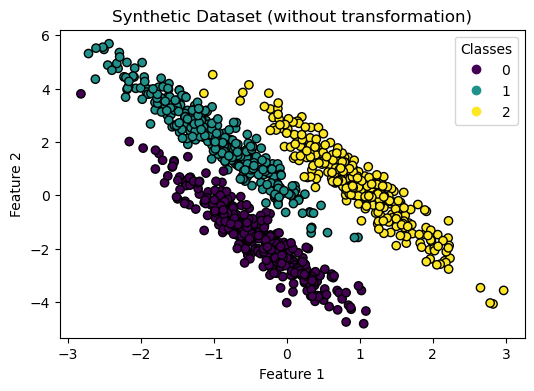

In [18]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6,4))

scatter = ax.scatter(X[:,0], X[:,1],c=y, edgecolor='black')
ax.set(
    title='Synthetic Dataset (without transformation)',
    xlabel='Feature 1',
    ylabel='Feature 2'
)
ax.legend(*scatter.legend_elements(),title='Classes')

In [14]:
import numpy as np
transformation = [[0.4,0.2],[-0.4,1.2]]
X = np.dot(X,transformation)

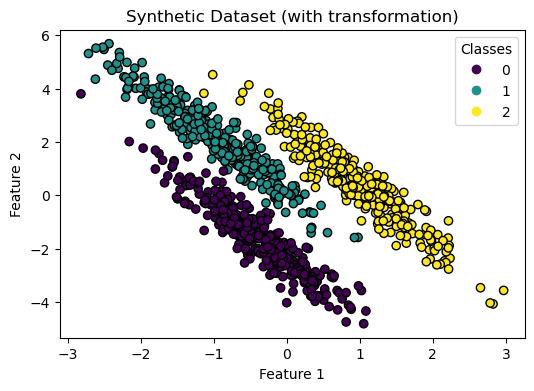

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(X[:,0], X[:,1],c=y, edgecolor='black')
ax.set(
    title='Synthetic Dataset (with transformation)',
    xlabel='Feature 1',
    ylabel='Feature 2'
)
ax.legend(*scatter.legend_elements(),title='Classes')

## Classifer
We train two different logistic regression classifiers: multinomial and one-vs-rest. The multinomial classifier handles all classes **simultaneously**, while the one-vs-rest approach trains a binary classifier for **each class against all others**.

In [22]:
from sklearn.linear_model import LogisticRegression
logistic_regression_multinomial = LogisticRegression().fit(X, y)
accuracy_multinomial = logistic_regression_multinomial.score(X,y)

## Decision Boundaries Visualization

Text(0.5, 1.0, 'Multinomial Logistic Regression. Accuracy0.995')

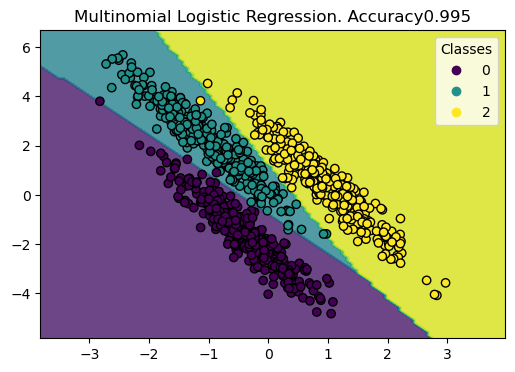

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay
fig, ax = plt.subplots(figsize=(6,4))
DecisionBoundaryDisplay.from_estimator(
    logistic_regression_multinomial,
    X,
    ax=ax,
    response_method='predict',
    alpha=0.8
)
scatter = ax.scatter(X[:,0],X[:,1],c=y,edgecolor='k')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.set_title(f"Multinomial Logistic Regression. Accuracy{accuracy_multinomial}")

✅

Hyperplanes Visulization

In [42]:
def plot_hyperplanes(classifier,X,ax):
    xmin,xmax = X[:,0].min(), X[:,0].max()
    ymin,ymax = X[:,1].min(), X[:,1].max()
    ax.set(
        xlim= (xmin,xmax),
        ylim= (ymin,ymax)
    )
    coef = classifier.coef_
    intercept=classifier.intercept_

    # w0​x0​+w1​x1​+b=0
    for i in range(coef.shape[0]):
        w = coef[i] # 第一类的 w系数权重
        a = -w[0] / w[1] # 第i类斜率
        xx = np.linspace(xmin, xmax)
        yy = a*xx - (intercept[i])/w[1]
        ax.plot(xx,yy,'--',label=f'class{i}')
    
        
    

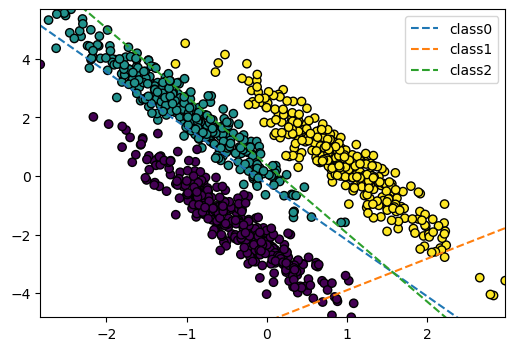

In [48]:
fig,ax = plt.subplots(figsize=(6,4))

plot_hyperplanes(logistic_regression_multinomial,X,ax)
ax.scatter(X[:,0], X[:,1],c=y, edgecolor='k')
ax.legend()

In [40]:
logistic_regression_multinomial.coef_

array([[-5.84849717, -3.05166908],
       [-0.40150214,  0.37385597],
       [ 6.24999931,  2.67781311]])

✅